In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv(r'C:\Users\surap\Desktop\Aishwarya\Mini\parkinsons.csv')

X = data.drop(columns=['name', 'status'])
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

def predict_parkinsons(input_features):
    input_scaled = scaler.transform([input_features])  
    prediction = clf.predict(input_scaled)
    return "Parkinson's Detected" if prediction[0] == 1 else "No Parkinson's"

test_input = X_test[0] 
print("Test Prediction:", predict_parkinsons(test_input))



Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39

Test Prediction: Parkinson's Detected


C:\Users\surap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv(r'C:\Users\surap\Desktop\Aishwarya\Mini\parkinsons.csv')


X = data.drop(columns=['name', 'status'])
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_report(y_test, y_pred)
    }


for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("-" * 50)

def predict_parkinsons(input_features, model):
    
    input_scaled = scaler.transform([input_features])  
    prediction = model.predict(input_scaled)
    return "Parkinson's Detected" if prediction[0] == 1 else "No Parkinson's"

test_input = X_test[38] 

print("SVM Prediction:", predict_parkinsons(test_input, models["SVM"]))
print("Random Forest Prediction:", predict_parkinsons(test_input, models["Random Forest"]))
print("KNN Prediction:", predict_parkinsons(test_input, models["K-Nearest Neighbors"]))



Model: SVM
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39

--------------------------------------------------
Model: Random Forest
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

--------------------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0    

C:\Users\surap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\surap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\surap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


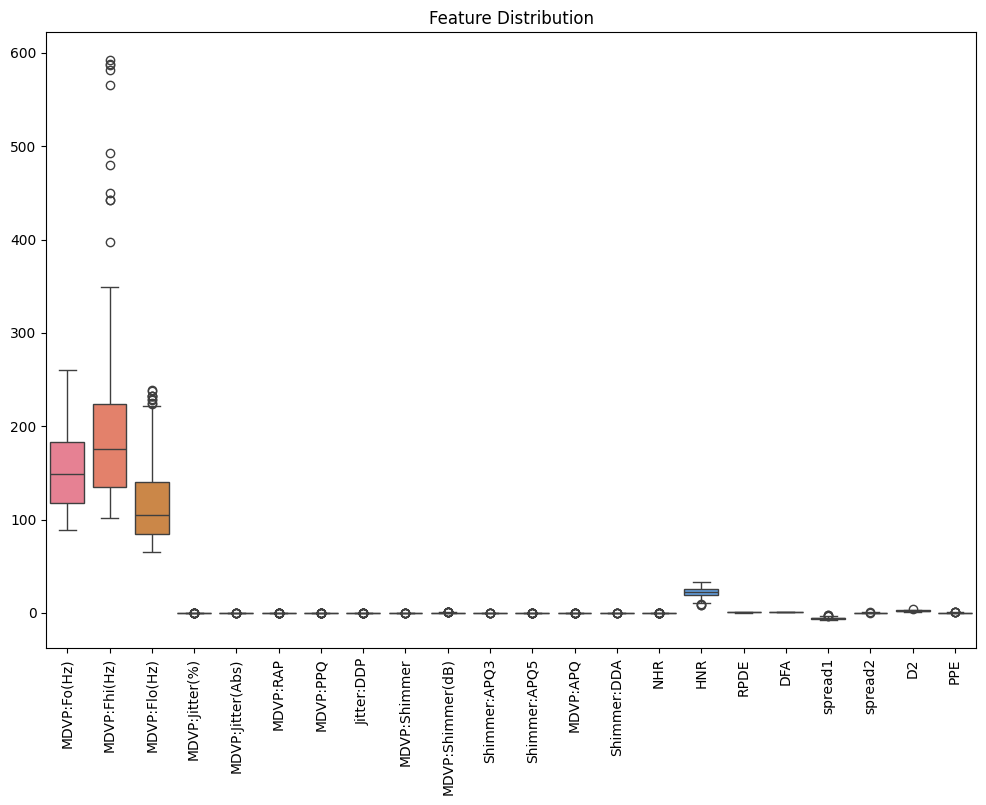

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r'C:\Users\surap\Desktop\Aishwarya\Mini\parkinsons.csv')
X = data.drop(columns=['name', 'status']) 

plt.figure(figsize=(12, 8))

sns.boxplot(data=X)

plt.xticks(rotation=90)

plt.title('Feature Distribution')

plt.show()

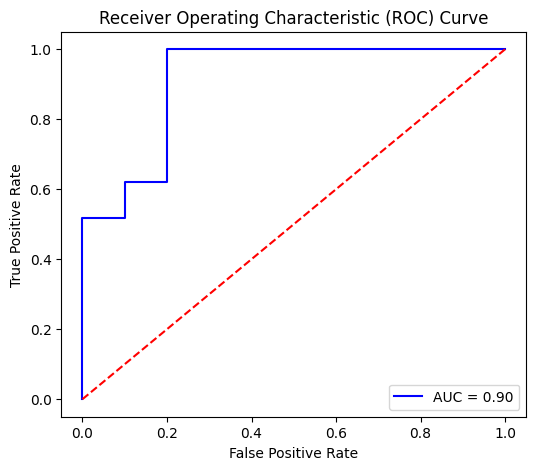

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score


import pandas as pd
data = pd.read_csv(r"C:\Users\surap\Desktop\Aishwarya\Mini\parkinsons.csv")


X = data.drop(columns=['name', 'status'])
y = data['status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(X_test))  # Use decision function for SVM
roc_auc = roc_auc_score(y_test, y_pred)  

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

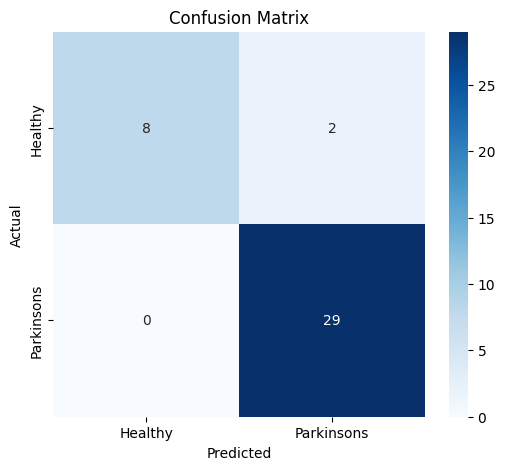

Accuracy: 0.95


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv(r"C:\Users\surap\Desktop\Aishwarya\Mini\parkinsons.csv")

# Separate features and target
X = data.drop(columns=['name', 'status'])  # Remove 'name' and 'status' from features
y = data['status']  # 'status' is the target variable (Healthy or Parkinsons)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a classifier (e.g., SVM)
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')